## Kaggle NLP-getting-started competition
https://www.kaggle.com/c/nlp-getting-started/

**Competition Description**

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.

n this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running. 


## Notebook Objectives
- Implement simple Naive Bayes model with minimum text preprocessing

## Imports

In [1]:
import numpy as np
import pandas as pd

import string

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

from utils import create_report

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


## Load Data

In [4]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [5]:
print(f"Training dataset has {train_df.shape[0]} rows.\nTest dataset has {test_df.shape[0]} rows.\n")
display(train_df.head())

Training dataset has 7613 rows.
Test dataset has 3263 rows.



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Check for missing data**

In [6]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

No missing data in the text column so ok to proceed

**Check for class imbalance**

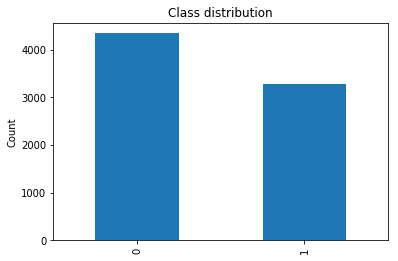


Class percentage of dataset


0    0.57034
1    0.42966
Name: target, dtype: float64

In [7]:
train_df['target'].value_counts().plot(kind='bar')
plt.title("Class distribution")
plt.ylabel("Count")
plt.show()

print("\nClass percentage of dataset")
train_df['target'].value_counts(normalize=True)

The classes are pretty evenly balanced (57:42) so this should not be a problem with training the model.

## Naive Bayes 
The first model to try is a very simple Naive Bayes approach.

This is not expected to perform too well as the dataset size is very small and legitimate disaster tweets are likely to contain very similar words to the fake disaster tweets making it hard to distinguish between the two categories. Naive Bayes is a 'bag of words' approach and does not take into account context which is likely to be very important for this particular classification task.

However, the model is very simple and will act as a good baseline comparison for any future, more complicated models.

### Model Evaluation
Note that, as per the competition rules, the preidctions will be evaluated by the F1-Score.

### Create training and test sets

Only need the 'text' column as a feature for the Naive Bayes model

Before applying the Naive Bayes model we need to convert the tweet text into a 'bag of words'. The processing steps will include:
- remove numbers and punctuation
- make words lowercase
- use the Sklearn Countvectorizer methods to convert the text into a matrix of token counts

In [8]:
def remove_punctuation(tweet):
    """remove digits and punctuation then convert to lower case"""
    return tweet.translate(str.maketrans('', '', string.digits + string.punctuation)).lower().strip()

In [9]:
#create features/targets for train and test set
X_train, X_test, y_train, y_test = train_test_split(
    train_df['text'], train_df['target'], test_size=0.33, random_state=42, shuffle=True)

#preprocess text
X_train = X_train.apply(remove_punctuation)
X_test = X_test.apply(remove_punctuation)

vect = CountVectorizer(stop_words = 'english')

x_train_cv = vect.fit_transform(X_train)
x_test_cv = vect.transform(X_test)

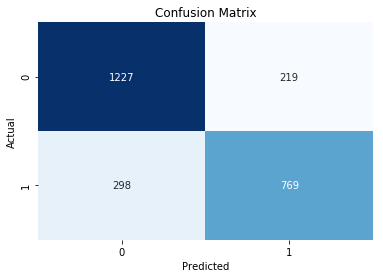

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1446
           1       0.78      0.72      0.75      1067

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.79      2513
weighted avg       0.79      0.79      0.79      2513

F1 score: 0.748418491484185


In [10]:
#fit model
clf = MultinomialNB()
clf.fit(x_train_cv, y_train)

#make predictions
pred = clf.predict(x_test_cv)

#
create_report(y_test,pred)

The baseline model gave an F1 score of 0.74 and accuracy of 0.79 on the test set - not bad for a baseline model with minimal text preprocessing!

The precision and recall scores are similar which shows that the model is not particularly better or worse at correctly prediction disaster tweets versus non-disaster tweets.

## Make submission file

- retrain on all training data
- apply data cleaning to test data
- create csv file

In [11]:
#retrain on all data
X_train = train_df['text'].apply(remove_punctuation)

vect = CountVectorizer(stop_words = 'english')
X_train = vect.fit_transform(X_train)

y_train = train_df['target']

clf = MultinomialNB()
clf.fit(X_train,y_train)

X_test = test_df['text'].apply(remove_punctuation)
X_test = vect.transform(X_test)
pred = clf.predict(X_test)

In [12]:
final_predictions = pd.DataFrame({'id':test_df['id'],'target':pred})
final_predictions.to_csv("./submissions/baseline-NB.csv",index=False)

-------------

We can use this accuracy score of 79% as the baseline performance for future models